In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from os import listdir
from numpy import asarray
from numpy import save
from random import sample
import keras
import keras.preprocessing.image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
import glob
import pandas as pd

## Завантаження даних.

In [2]:
file_list_train = os.listdir('train')
print("Тренувальна виборка: ", len(file_list_train))

Тренувальна виборка:  14278


### Зменьшуємо тренувальну виборку до 1800 собак і до 1800 котів. Загалом фото - 3600

In [3]:
file_list_test = os.listdir('test1')
print("Валідаційна виборка: ", len(file_list_test))

Валідаційна виборка:  12500


### Зменьшуємо валідаційну виборку до 500

In [4]:
file_name = []
file_class = []
for row in file_list_train:
    class_ = row.split('.')[0]
    if file_class.count(class_) < 1800 and row != 'dog.11597.jpg':
        file_name.append('train/' + row)
        file_class.append(class_)

df_train = pd.DataFrame({'file': file_name,
                        'class': file_class})

df_train

,file,class
0,train/cat.5115.jpg,cat
1,train/cat.122.jpg,cat
2,train/dog.10140.jpg,dog
3,train/cat.1832.jpg,cat
4,train/cat.3263.jpg,cat
...,...,...
3572,train/dog.10553.jpg,dog
3573,train/dog.10855.jpg,dog
3574,train/dog.10381.jpg,dog
3575,train/dog.11333.jpg,dog


In [5]:
file_name = []

for row in file_list_test:
    if len(file_name) < 100 and row != 'dog.11597.jpg':
        file_name.append('test1/' + row)

df_valid = pd.DataFrame({'file': file_name})

df_valid

,file
0,test1/1522.jpg
1,test1/10806.jpg
2,test1/1328.jpg
3,test1/12237.jpg
4,test1/11123.jpg
...,...
95,test1/5240.jpg
96,test1/11470.jpg
97,test1/9426.jpg
98,test1/7333.jpg


### Візуалізація тренувальної виборки

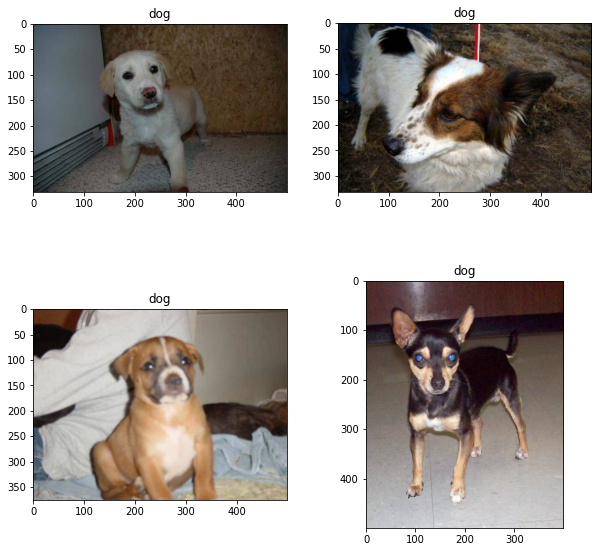

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = axs.ravel()
for i in range(0,4):
    idx = random.choice(df_train.index)
    axs[i].imshow(Image.open(df_train['file'][idx]))
    axs[i].set_title(df_train['class'][idx])

### Візуалізація валідаційної виборки

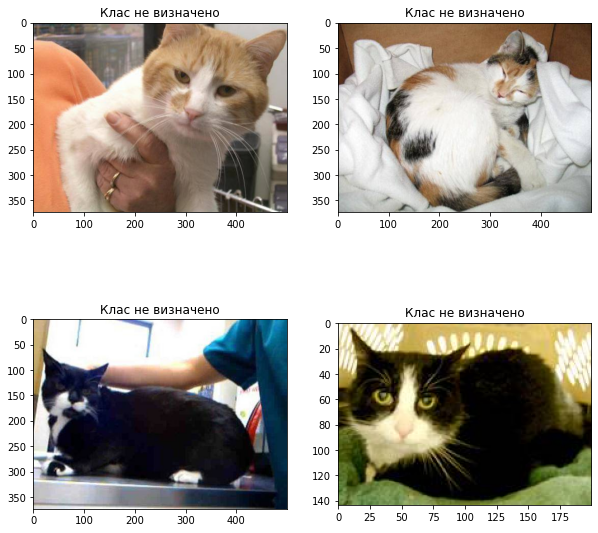

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = axs.ravel()
for i in range(0,4):
    idx = random.choice(df_valid.index)
    axs[i].imshow(Image.open(df_valid['file'][idx]))
    axs[i].set_title("Клас не визначено")

## Препроцессінг фотографій.

In [8]:
df_train

,file,class
0,train/cat.5115.jpg,cat
1,train/cat.122.jpg,cat
2,train/dog.10140.jpg,dog
3,train/cat.1832.jpg,cat
4,train/cat.3263.jpg,cat
...,...,...
3572,train/dog.10553.jpg,dog
3573,train/dog.10855.jpg,dog
3574,train/dog.10381.jpg,dog
3575,train/dog.11333.jpg,dog


In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2, random_state=42)

In [13]:
train_file = list(train_df['file'])
train_class = list(train_df['class'])
train_photo = []
train_binary_class = []

test_file = list(test_df['file'])
test_class = list(test_df['class'])
test_photo = []
test_binary_class = []

for i in train_file:
    photo = load_img(i, target_size=(100, 100))
    photo = img_to_array(photo)
    train_photo.append(photo)

for i in train_class:
    if i == 'cat':
        train_binary_class.append(0)
    else:
        train_binary_class.append(1)


for i in test_file:
    photo = load_img(i, target_size=(100, 100))
    photo = img_to_array(photo)
    test_photo.append(photo)

for i in test_class:
    if i == 'cat':
        test_binary_class.append(0)
    else:
        test_binary_class.append(1)

train_photo = np.array(train_photo)
train_binary_class = np.array(train_binary_class)

test_photo = np.array(test_photo)
test_binary_class = np.array(test_binary_class)

In [15]:
print("Всього в тренувальній: ", len(train_class))
print("Всього котів в тренувальній: ", train_class.count('cat'))
print("Всього собак в тренувальній: ", train_class.count('dog'))

print("Всього в тестовій: ", len(test_class))
print("Всього котів в тестовій: ", test_class.count('cat'))
print("Всього собак в тестовій: ", test_class.count('dog'))


Всього в тренувальній:  2861
Всього котів в тренувальній:  1437
Всього собак в тренувальній:  1424
Всього в тестовій:  716
Всього котів в тестовій:  363
Всього собак в тестовій:  353


## Тренування моделі

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_photo, train_binary_class, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(test_photo, test_binary_class)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Epoch 1/10
90/90 [==============================] - 27s 287ms/step - loss: 4.1931 - accuracy: 0.5316
Epoch 2/10
90/90 [==============================] - 119s 1s/step - loss: 0.6712 - accuracy: 0.5890
Epoch 3/10
90/90 [==============================] - 132s 1s/step - loss: 0.6568 - accuracy: 0.6333
Epoch 4/10
90/90 [==============================] - 26s 276ms/step - loss: 0.6444 - accuracy: 0.6173
Epoch 5/10
90/90 [==============================] - 83s 932ms/step - loss: 0.6012 - accuracy: 0.6679
Epoch 6/10
90/90 [==============================] - 132s 1s/step - loss: 0.5345 - accuracy: 0.7200
Epoch 7/10
90/90 [==============================] - 74s 811ms/step - loss: 0.4648 - accuracy: 0.7693
Epoch 8/10
90/90 [==============================] - 38s 428ms/step - loss: 0.3736 - accuracy: 0.8308
Epoch 9/10
90/90 [==============================] - 130s 1s/step - loss: 0.2755 - accuracy: 0.8819
Epoch 10/10
23/23 [==============================] - 2s 76ms/step - loss: 1.7826 - accuracy: 0.5684

## Предікт

In [16]:
df_valid.head(5)

,file
0,test1/1522.jpg
1,test1/10806.jpg
2,test1/1328.jpg
3,test1/12237.jpg
4,test1/11123.jpg


In [17]:
valid_photo = []

for i in list(df_valid['file']):
    photo = load_img(i, target_size=(100, 100))
    photo = img_to_array(photo)
    valid_photo.append(photo)

valid_photo = np.array(valid_photo)

In [24]:

predictions = model.predict(valid_photo)
predictions_class = ['dog' if p > 0.5 else 'cat' for p in predictions]

df_valid['class'] = predictions_class

4/4 [==============================] - 0s 54ms/step


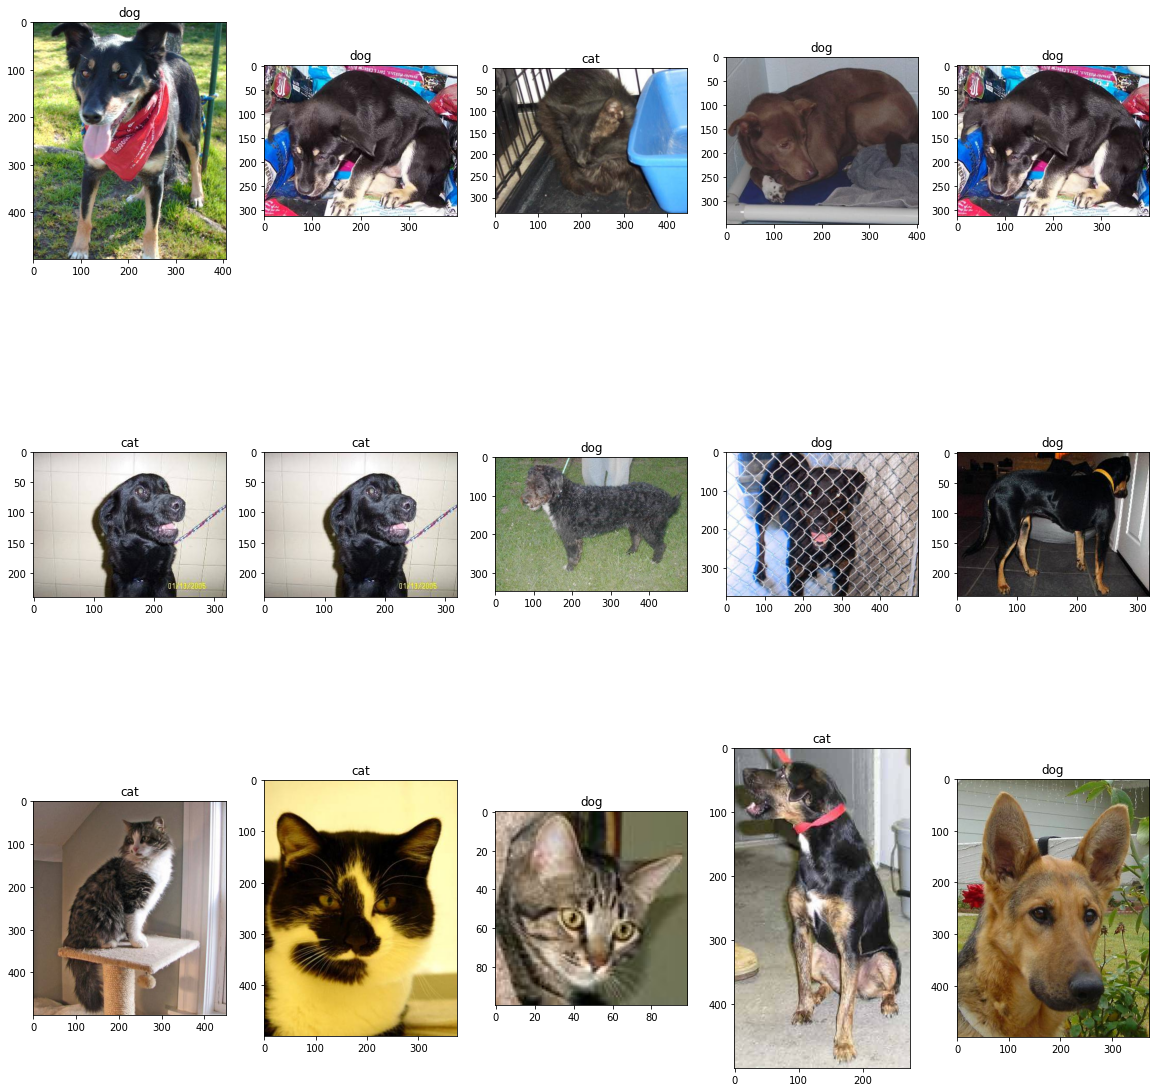

In [26]:
fig, axs = plt.subplots(3, 5, figsize=(20,20))
axs = axs.ravel()
for i in range(0, 15):
    idx = random.choice(df_valid.index)
    axs[i].imshow(Image.open(df_valid['file'][idx]))
    axs[i].set_title(df_valid['class'][idx])